<a href="https://colab.research.google.com/github/Saneesh122/Data-Processing-Visualization-/blob/main/quiz_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sanish Shrestha 
Quiz-12 

**1.Use the SQL table bigquery-public-data.london_fire_brigade.fire_brigade_service_calls.**

A.How many entries are there in the dataset

B.How many False Alarms happened between 10PM and 5 AM?

C.What is the average number of num_pumps_attending when there is a Fire?

D.What is the largest number of num_pumps_attending to a Road Vehicle property_category

**2.Navigate to the Oklahoma wikipedia page. Grab the table on tempuratures in largest cities.**

A.What is the average monthly temperature for OKC?

B.Create a plot of the average monthly tempurature in Tulsa.

C.Identify the city with the highest average tempurature in each month.

My very first set would be getting authenticated through google for futher process. 

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')


Authenticated


Now that I have been authenticated I will solve the first question of number 1:a

In [3]:
%%bigquery --project projectfordatavisualization
SELECT 
  COUNT(*) as total_rows
FROM `bigquery-public-data.london_fire_brigade.fire_brigade_service_calls`

total_rows
0       32247

By the above code we got the value of total rows. 

Finding total false alarm happened between 10PM and 5 AM:- 

In [4]:
%%bigquery --project projectfordatavisualization
SELECT *
FROM `bigquery-public-data.london_fire_brigade.fire_brigade_service_calls`
LIMIT 10

incident_number  ... num_pumps_attending
0  000320-01012017  ...                   2
1  003727-09012017  ...                   2
2  003762-09012017  ...                   2
3  006403-16012017  ...                   2
4  010947-26012017  ...                   1
5  014169-03022017  ...                   5
6  016263-08022017  ...                   2
7  016865-09022017  ...                   1
8  017092-10022017  ...                   1
9  024609-27022017  ...                   1

[10 rows x 32 columns]

I will use where command and join it with AND and OR clauses:- 

In [5]:
%%bigquery --project projectfordatavisualization
SELECT COUNT(*) as number_of_late_night_false_alarms
FROM `bigquery-public-data.london_fire_brigade.fire_brigade_service_calls`
WHERE incident_group = "False Alarm" AND (hour_of_call >= 22 OR hour_of_call <= 4)

number_of_late_night_false_alarms
0                               2825

There were 2825 false alarm in total between those hours. 

Now, I am going to find average number of num_pumps_attending when there is a fire:- 

In [6]:
%%bigquery --project projectfordatavisualization
SELECT incident_group, AVG(num_pumps_attending) as avg_pumps_attending
FROM `bigquery-public-data.london_fire_brigade.fire_brigade_service_calls`
GROUP BY incident_group

incident_group  avg_pumps_attending
0      False Alarm             1.725776
1             Fire             1.633012
2  Special Service             1.177192

Now, let's solve the second question by navigating Oklahoma wikipedia page. 

In [7]:
import requests
import pandas as pa
from bs4 import BeautifulSoup


r = requests.get('https://en.wikipedia.org/wiki/Oklahoma')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
tables = html_soup.find_all('table',class_="wikitable")

df = pa.read_html(str(tables))[0]


df = df.melt(id_vars = ['City','Unnamed: 1'],
                  value_vars = df.columns[2:],
                  var_name = 'month'
)

df.value = df.value.apply(lambda s: int(s[:2]))

df.columns = ['City','Low_High', 'Month','Temp_F']

df

City   Low_High Month  Temp_F
0   Oklahoma City  Avg. high   Jan      50
1   Oklahoma City   Avg. low   Jan      29
2           Tulsa  Avg. high   Jan      48
3           Tulsa   Avg. low   Jan      27
4          Lawton  Avg. high   Jan      50
..            ...        ...   ...     ...
67  Oklahoma City   Avg. low   Dec      31
68          Tulsa  Avg. high   Dec      49
69          Tulsa   Avg. low   Dec      30
70         Lawton  Avg. high   Dec      52
71         Lawton   Avg. low   Dec      30

[72 rows x 4 columns]

let's go ahead and find the Oklahoma city average month temperature:- 

In [8]:
df.query('City == "Oklahoma City" and Low_High == "Avg. high"').Temp_F.mean()

72.25

Now, I shall be plotting the average monthly tempurature in Tulsa:- 

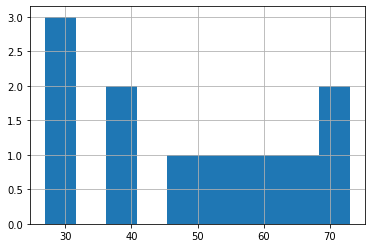

In [9]:
df.query('City == "Tulsa" and Low_High == "Avg. low"').Temp_F.hist()

Now at the end let's go ahead and see the highest average tempurature in each month of the cities:- 

In [10]:
df[df.Temp_F == df.groupby('Month').Temp_F.transform(max)]

City   Low_High  Month  Temp_F
0   Oklahoma City  Avg. high    Jan      50
4          Lawton  Avg. high    Jan      50
10         Lawton  Avg. high    Feb      56
16         Lawton  Avg. high  March      65
18  Oklahoma City  Avg. high  April      73
22         Lawton  Avg. high  April      73
28         Lawton  Avg. high    May      82
34         Lawton  Avg. high   June      90
40         Lawton  Avg. high   July      96
46         Lawton  Avg. high    Aug      95
52         Lawton  Avg. high   Sept      86
58         Lawton  Avg. high    Oct      76
60  Oklahoma City  Avg. high    Nov      62
64         Lawton  Avg. high    Nov      62
70         Lawton  Avg. high    Dec      52

And I guess we are done here. Thank you. 